# <p style="text-align: center;"> Social Butterfly - Umbrella Academy - After Metadata </p>

![title](Title_Image.jpg)

In [37]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# <p style="text-align: center;"> Table of Contents </p>
- ## 1. [Introduction](#Introduction)
   - ### 1.1 [Abstract](#abstract)
   - ### 1.2 [Importing Libraries](#importing_libraries)
   - ### 1.3 [Streaming](#streaming)
       - ### 1.3.1[Setting up Stream Listener](#stream_listener)
       - ### 1.3.2[Starting the Listener](#starting_the_listener)
       - ### 1.3.3[Making a Dataframe](#making_dataframe)
   - ### 1.4 [Dataset Summary](#dataset_summary)
   - ### 1.5 [Dataset Cleaning](#dataset_cleaning)
       - ### 1.5.1[Functions to clean data](#functions_for_cleaning)
- ## 2. [Wordclouds](#wordclouds)
   - ### 2.1 [Number of words in a text](#number_of_words)
   - ### 2.2 [Generating Wordclouds](#Generating_Wordclouds)
   - ### 2.3 [Masking the wordcloud](#masking_wordcloud)
   - ### 2.4 [Preparing Wordclouds](#preparing_wordcloud)
   - ### 2.5 [Function for Building a GIF](#gif_building)
- ## 3. [LSTM](#lstm)
   - ### 3.1 [Creating character/word mappings](#char_and_word_mapping)
   - ### 3.2 [Creating set of words](#creating_set_words)
   - ### 3.3 [Creating sequences](#creating_sequences)
- ## 9. [Conclusion](#Conclusion)
- ## 10. [Contribution](#Contribution)
- ## 11. [Citation](#Citation)
- ## 12. [License](#License)

# <p style="text-align: center;"> 1.0 Introduction </p> <a id='Introduction'></a>

# 1.1 Abstract <a id='abstract'></a>

Now that we have collected the Metadata in the previous notebook(go to the [Link](Collecting_Metadata_GIT.ipynb) if you haven't seen it yet). We can now stream data from twitter using these most occuring hashtags. 

[Back to top](#Introduction)

# 1.2 Importing Libraries <a id='importing_libraries'></a>

In this step, we import libraries that we need for this notebook. A few basic libraries like numpy, pandas, matplotlib etc are used. Other libraries like tweepy, json, csv are used to collect data from twitter and save them as a json and csv file. Libraries like base

[Back to top](#Introduction)

In [202]:
import json
import tweepy
import csv
import codecs

from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from textblob import TextBlob  

import time
import os

import pandas as pd
from pandas.io.json import json_normalize as jn

import re,string
import base64 
from scipy.misc import imread
import codecs

from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator

import matplotlib.pyplot as plt


from IPython.display import HTML
from matplotlib.pyplot import *
from matplotlib import cm
from matplotlib import animation
import io
import imageio

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import np_utils

twitter_cred = dict()

twitter_cred['CONSUMER_KEY'] = '17XHiftb4Iu5hVAIh4NacWj9S'
twitter_cred['CONSUMER_SECRET'] = '8xAXhFsfnkiFjSFO5THqRO5J8x8lKSzC9J2GNPUSY7ZPb5z6Qv'
twitter_cred['ACCESS_KEY'] = '1392379572-FInzXaziEqyNCGc8jqtU9LwnFFlHYRpjoihZpiX'
twitter_cred['ACCESS_SECRET'] = 'JBDveSiUU6aXpwx8QkxYhXloDr9DyHn7ocqrqgWqwqctw'

Using TensorFlow backend.


In [77]:
with open('twitter_credentials.json', 'w') as secret_info:
    json.dump(twitter_cred, secret_info, indent=4, sort_keys=True)
    

In [78]:
with open('twitter_credentials.json') as cred_data:
    info = json.load(cred_data)
    consumer_key = info['CONSUMER_KEY']
    consumer_secret = info['CONSUMER_SECRET']
    access_key = info['ACCESS_KEY']
    access_secret = info['ACCESS_SECRET']

# Create the api endpoint

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)

# 1.3 Streaming <a id='streaming'></a>

For collecting Metadata, we used user inputs for how many tweets should be collected and which hashtags should be scraped. However in this part, we'll use the most occuring hashtags as input and run it for a longer time (5 hours or more).

[Back to top](#Introduction)

# 1.3.1 Setting up Stream Listener<a id='stream_listener'></a>
Here we'll set up a Stream Listener which will save the scraped tweets in a json file. We will also make sure that the tweets that we're collecting are not Retweets as there could be multiple retweets with the same content, which would make the content redundant.

[Back to top](#streaming)

In [79]:

start_time = time.time()
class MyListener(StreamListener):
    def __init__(self, start_time, time_limit=60):
 
        self.time = start_time
        self.limit = time_limit
        self.tweet_data = []
        self.saveFile = open('raw_tweets.json', 'a', encoding='utf-8')
    
    def on_data(self, data):
        
        if (time.time() - self.time) < self.limit:
            decoded = json.loads(data)
            if  not decoded['text'].startswith('RT'):
                try:
                    self.tweet_data.append(data)
                    saveFile = open('raw_tweets.json', 'w', encoding='utf-8')
                    saveFile.write(u'[\n')
                    saveFile.write(','.join(self.tweet_data))
                    saveFile.write(u'\n]')
                    saveFile.close()
                    #exit()
                    return True
                except BaseException as e:
                    print("Error on_data: %s" % str(e))
                    time.sleep(5)
                return True
        else:
            self.saveFile.close()
            return False 
                
    
    
    def on_error(self, status):
        print(status)
        return True


#if __name__ == '__main__':
    #MyListener = MyListener()
    #auth = OAuthHandler(consumer_key, consumer_secret)
    #auth.set_access_token(access_key, access_secret)
    #stream = Stream(auth,MyListener )
    #stream.filter(track=['#ML', '#Datascience', '#Arima'])



# 1.3.2 Starting the Listener<a id='starting_the_listener'></a>

In this step we start the stream listener for the given timeframe. We also filter our stream such that it only collects data on the given hashtags. We also restrict the language to english so as to not deal with non-ascii characters. 

[Back to top](#streaming)

In [80]:
# #MyListener = MyListener()
# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_key, access_secret)
# stream = Stream(auth,MyListener(start_time, time_limit=3600) )
# stream.filter(track=['#ML', '#AI', '#deeplearning'],languages =["en"])


# 1.3.3 Making a Dataframe<a id='making_dataframe'></a>

In this step we will normalize the json file that we have, since it is in nested form(JSON Object inside a JSON Object). After this we save the file to a dataframe, since it is easier to work with a Pandas' Dataframe.

[Back to top](#streaming)

In [192]:
# data=open('raw_tweets.json', 'r', encoding='utf-8')
# df = pandas.io.json.json_normalize(data)
# df.columns = df.columns.map(lambda x: x.split(".")[-1])
# df.head()

with open('raw_tweets.json', 'r', encoding="utf-8") as json_file:
    json_work = json.load(json_file)
    
df = pd.io.json.json_normalize(json_work)

Since we'll be working with only the text values in our algorithm, we don't need any other extracted columns. So we select only the column 'text'.

In [193]:
#Setting our source for text generation
df_clean=df['text']

In [194]:
#Making the dataframe
df_cleans=pd.DataFrame({'text':df_clean})

# 1.4 Dataset Summary <a id='dataset_summary'></a>
Since this dataset is scraped from twitter, it is bound to have some irregular values. In this step we check the summary of the dataset by checking the first 5 columns of the scraped data, checking the data types of the columns and checking the summary of the dataset.

[Back to top](#Introduction)

In [195]:
df_cleans.head()

,text
0,RT @WeAreLogikk: What Makes a #Good #DataEngin...
1,RT @JonathanAufray: Where #AI fits into #inbou...
2,RT @IFIClaims: Myth: #AI just needs #bigda. Re...
3,RT @milocamj: Artificial Intelligence In The D...
4,"@HurricaneAashay #Hinduism =&gt; following, un..."


In [196]:
df_cleans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10205 entries, 0 to 10204
Data columns (total 1 columns):
text    10205 non-null object
dtypes: object(1)
memory usage: 79.8+ KB


In [198]:
df_cleans.describe()

,text
count,10205
unique,6935
top,RT @iThink_Magazine: How many introverts can w...
freq,82


# 1.5 Dataset Cleaning <a id='dataset_cleaning'></a>

Since this dataset is scraped from twitter, it is bound to have some irregular values. By seeing the summary of our dataset we have gained some important insight about the type of data, and we need to clean the data to be able to further process it.

[Back to top](#Introduction)

### 1.5.1 Functions to clean data <a id='functions_for_cleaning'></a>

We have created a wide array of functions to clean the data by removing hashtags and other entities in the text ('@', 'â'..). Then we have removed all non-ascii characters from the text and also removed all Emojis. Along with this we are also extracting hashtags from the tweets and saving them in a seperate column

[Back to top](#dataset_cleaning)

In [121]:
def remove_RT(x):
    if x=="RT ":
        return " "
        #return str(x.replace('b\'RT ',''))

def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    #cleanString   = re.sub('\W+','', string )
    for link in links:
        text = text.replace(link[0], ', ')    
        #text = text.replace(cleanString, '')
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

def removeNonAscii(s): return "".join(i for i in s if ord(i)<128)

In [122]:
df_cleans['TextNoMentions']=df_cleans['text'].str.replace('RT', ' ')

In [123]:
df_cleans['TextNoMentions']=df_cleans['TextNoMentions'].str.replace('#', '', case=False)

In [124]:
#df_cleans['TextNoLinks']=df_cleans['text'].apply(strip_links)
df_cleans['TextNoMentions']=df_cleans['TextNoMentions'].str.replace('http\S+|www.\S+', '', case=False)

In [125]:
#df_cleans['TextNoEntities']=df_cleans['TextNoLinks'].apply(strip_all_entities)
df_cleans['TextNoMentions']=df_cleans['TextNoMentions'].apply(strip_all_entities)

In [126]:
df_cleans['TextNoMentions']=df_cleans['TextNoMentions'].apply(removeNonAscii)

In [127]:
a=df_cleans['TextNoMentions'].unique()

In [128]:
a=a.tolist()

In [129]:
df_cleaner=pd.DataFrame({'text':a})

In [130]:
df_cleaner.head()

,text
0,What Makes a Good DataEngineer dataengineer da...
1,Where AI fits into inboundmarketing BigData Di...
2,Myth AI just needs bigda Reality AI needs the ...
3,Artificial Intelligence In The Dairy Barn Forb...
4,Hinduism gt following understanding worshiping...


In [131]:
df_cleaner['text']=df_cleaner['text'].str.lower()

# <p style="text-align: center;"> 2.0 Wordclouds </p> <a id='wordclouds'></a>



[Back to top](#Introduction)

# 2.1 Number of words in a text <a id='number_of_words'></a>

[Back to top](#wordclouds)

In [132]:
# Lets check the avg number of words in text written by each author in a histogram 
def word_count(row):
    """function to calculate the count of words in a given text """
    text = row['text']
    text_splited = text.split(' ')
    word_count = text_splited.__len__()
    return word_count

df_cleaner['word_count'] = ''
df_cleaner['word_count'] = df_cleaner.apply(lambda row: word_count(row), axis =1)
df_cleaner.head()

,text,word_count
0,what makes a good dataengineer dataengineer da...,10
1,where ai fits into inboundmarketing bigdata di...,10
2,myth ai just needs bigda reality ai needs the ...,18
3,artificial intelligence in the dairy barn forb...,10
4,hinduism gt following understanding worshiping...,12


# 2.2 Generating Wordclouds <a id='Generating_Wordclouds'></a>

[Back to top](#wordclouds)

(-0.5, 399.5, 199.5, -0.5)

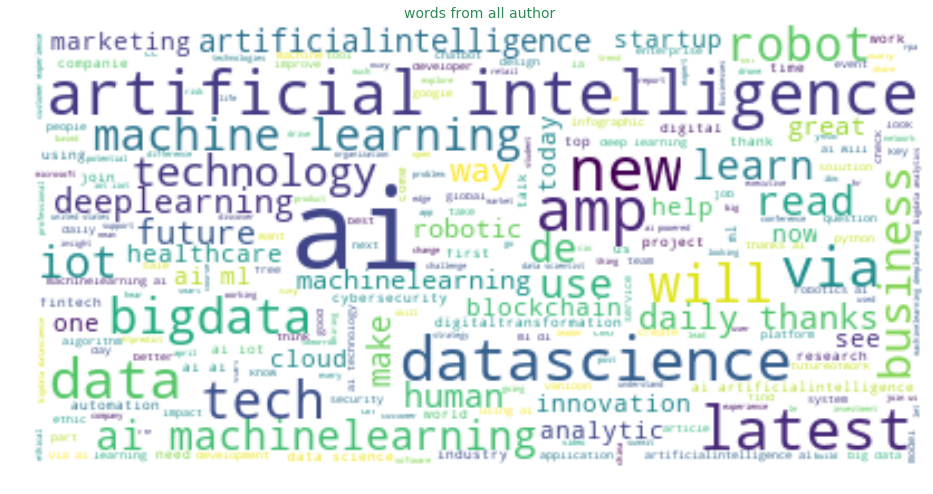

In [171]:
#mws = df_cleaner["text"].values

wc = WordCloud(background_color="white", max_words=5000, 
               stopwords=STOPWORDS, max_font_size= 50)
# generate word cloud
wc.generate(" ".join(df_cleaner.text.values))

# show
plt.figure(figsize=(16,13))
plt.imshow(wc, interpolation='bilinear')
plt.title("words from all author", fontsize=14,color='seagreen')
plt.axis("off")

# 2.3 Masking the wordcloud <a id='masking_wordcloud'></a>

[Back to top](#wordclouds)

In [134]:
def base_64(input_image):
    """ Function to convert the image to base64 """
    image = open(input_image, 'rb') #open binary file in read mode 
    image_read = image.read()
    output_base64 = base64.encodebytes(image_read)
    return output_base64

In [135]:
def codecs_img(input_image,base64_image):
    """Generate the Mask for EAP """
    f1 = open(input_image, "wb")
    f1.write(codecs.decode(base64_image,'base64'))
    f1.close()
    img1 = imageio.imread(input_image)
    #img = img1.resize((980,1000))
    #imgplot=plt.imshow(img1)
    #plt.show()
    hcmask=img1
    return hcmask 

In [157]:
mask = base_64('mask.png')
img1 = base_64('1.png')
img2 = base_64('2.png')
img3 = base_64('3.png')
img4 = base_64('4.png')

In [158]:
hcmask1 = codecs_img('mask.png' , mask)
hcmask2 = codecs_img('1.png' , img1)
hcmask3 = codecs_img('2.png' , img2)
hcmask4 = codecs_img('3.png' , img3)
hcmask5 = codecs_img('4.png' , img4)

Updating the stopwords because data from twitter has a few terms which appear over and over again, 
which have no relevance to our text like 'gt' which is an acronym for go to, it is added before a link, 
so along with removing links, we must also remove these words

In [188]:
Stopwords_Updated = ('amp', 'gt', 'via' ,'de')

In [190]:
STOPWORDS=STOPWORDS.union(Stopwords_Updated)

In [180]:
mask = df_cleaner['text'].values

In [181]:
def generate_wordcloud(words, mask):
    """ Generating Word Clouds """
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=STOPWORDS, mask=mask, max_font_size= 45).generate(" ".join(words))
    plt.figure(figsize=(10,8))
    image_colors = ImageColorGenerator(mask)
    plt.imshow(word_cloud, interpolation='bilinear') # interpolation(helps in masking)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    

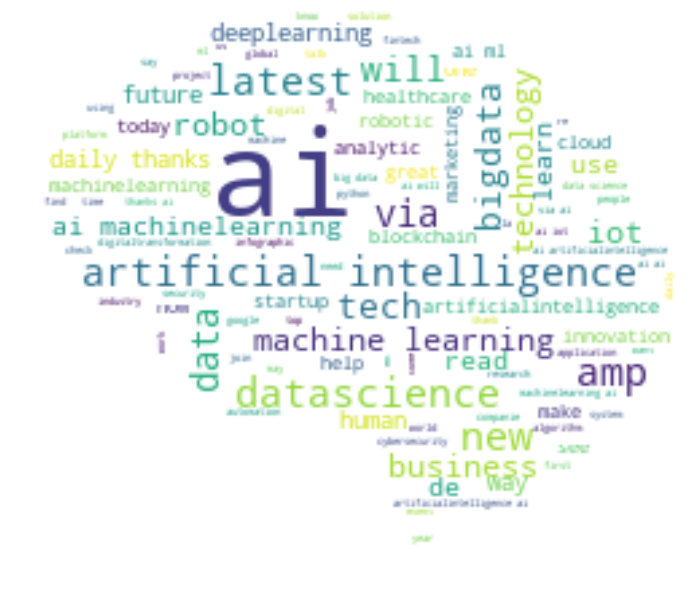

In [182]:
generate_wordcloud(mask,hcmask1)

# 2.4 Preparing Wordclouds <a id='preparing_wordcloud'></a>

[Back to top](#wordclouds)

In [155]:
def generate_wordclouds_gif(words, mask, wc_list):
    """ Generating Word Clouds """
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=STOPWORDS, mask=mask, max_font_size= 45).generate(" ".join(words))
    wc_list.append(word_cloud)
    return wc_list

In [156]:
wc_list=[]
generate_wordclouds_gif(mask, hcmask2, wc_list)
generate_wordclouds_gif(mask, hcmask3, wc_list)
generate_wordclouds_gif(mask, hcmask4, wc_list)
generate_wordclouds_gif(mask, hcmask5, wc_list)

# 2.5 Function for Building a GIF <a id='gif_building'></a>

[Back to top](#wordclouds)

In [149]:
start = time.time()
def build_gif(imgs = wc_list, show_gif=False, save_gif=True, title=''):
    """function to create a gif of heatmaps"""
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(21,15))
    ax.set_axis_off()
    author_range = ["A", "B", "C", "D", "E", "F"]
    def show_im(pairs):
        ax.clear()
        ax.set_title(str((pairs[0])))
        ax.imshow(pairs[1])
        ax.set_axis_off() 
    pairs = list(zip(author_range, imgs))
    im_ani = animation.FuncAnimation(fig, show_im, pairs,interval=450, repeat_delay=0, blit=False, repeat=True)
    plt.cla()
    if save_gif:
        im_ani.save('animation1.gif', writer='pillow') #, writer='imagemagick'
    if show_gif:
        plt.show()
    return
end = time.time()
print("Time taken by above cell is {}".format(end-start))

Time taken by above cell is 0.0


1.5777466297149658


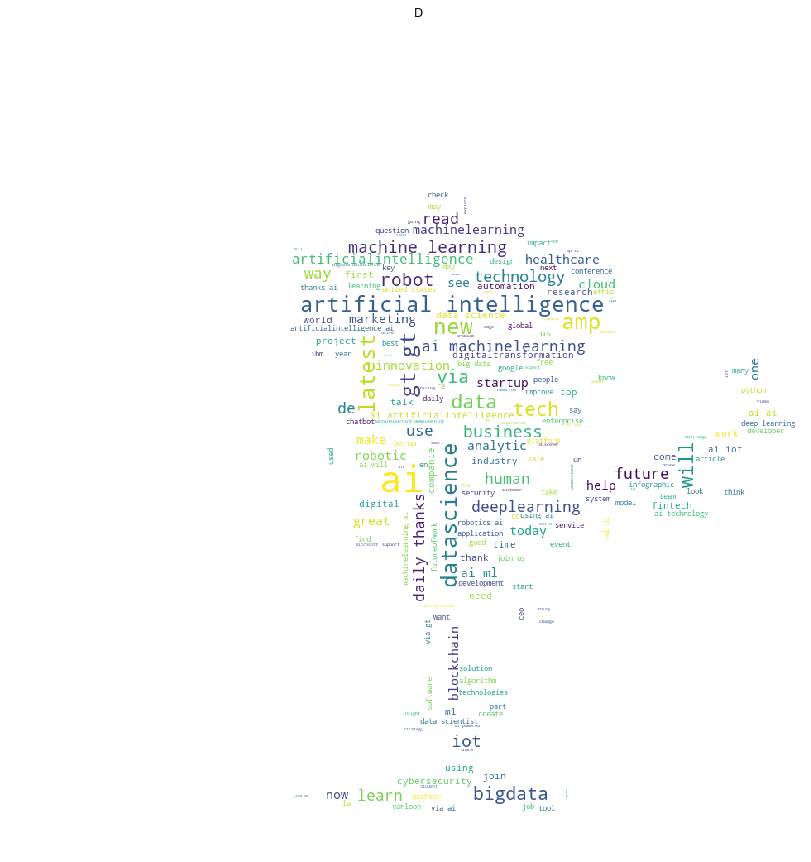

In [153]:
start = time.time()
build_gif()
end = time.time()
print(end-start)


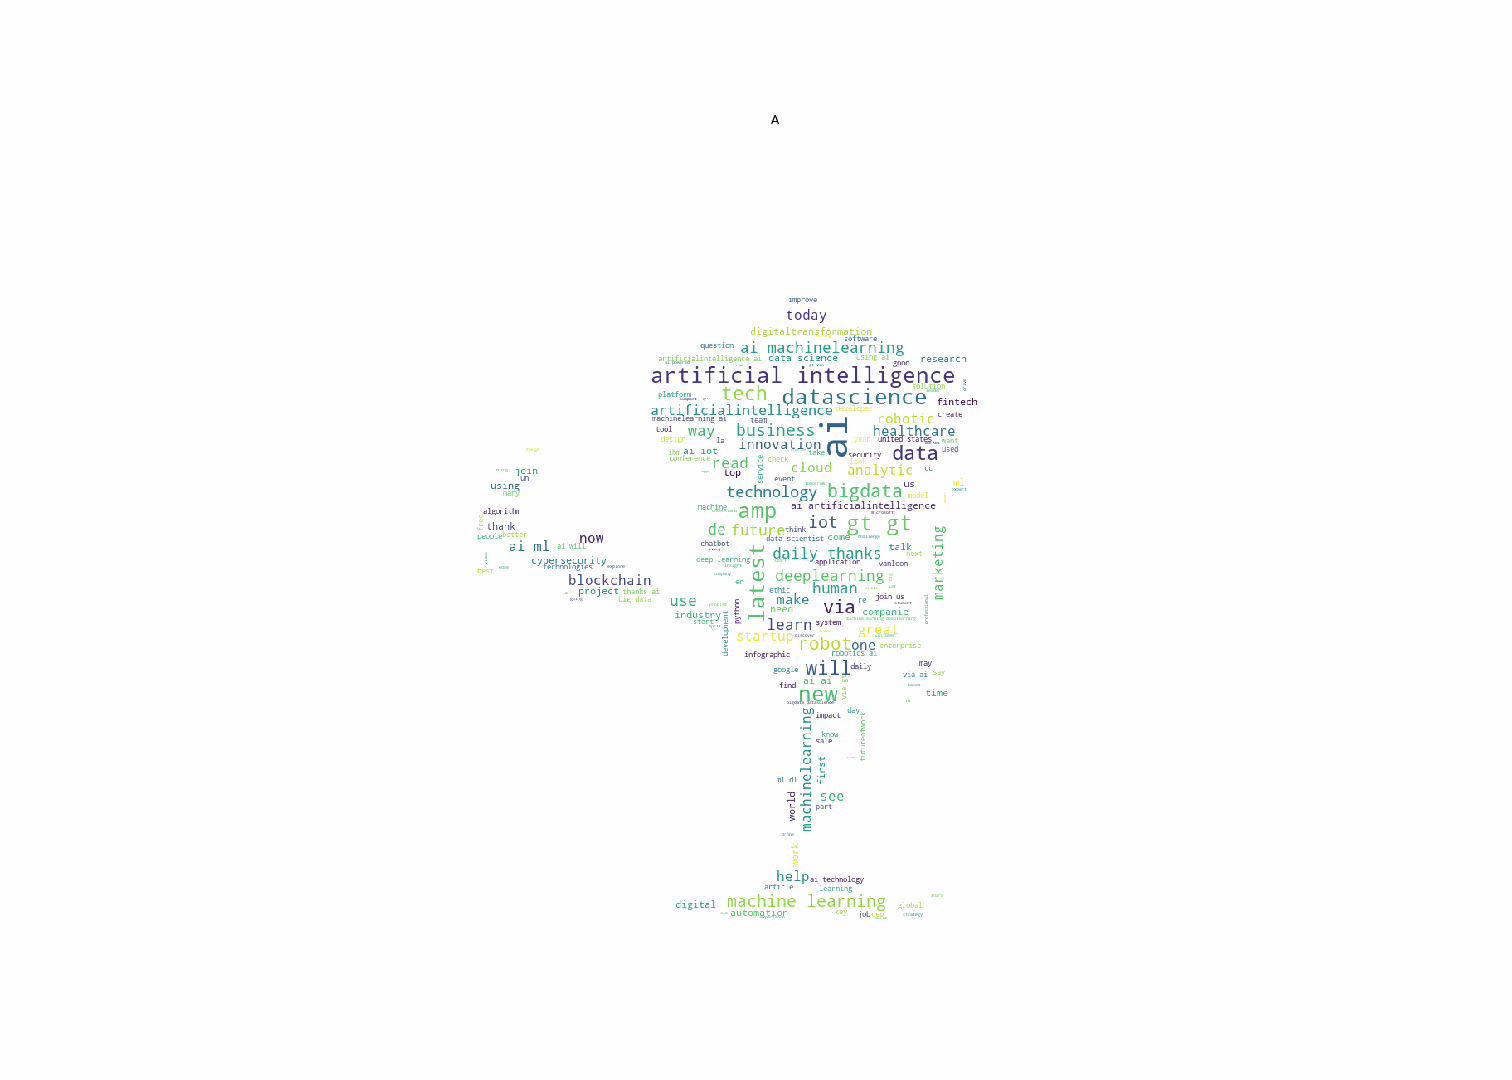

In [154]:
filename = 'animation1.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

# <p style="text-align: center;"> 3.0 LSTM</p> <a id='lstm'></a>



[Back to top](#Introduction)

# 3.1 Creating character/word mappings <a id='char_and_word_mapping'></a>

[Back to top](#lstm)

In [23]:
import string
 
# turn a doc into clean tokens
def clean_doc(row):
    # replace '--' with a space ' '
    text = row['text']
    text = text.replace('--', ' ')
    # split into tokens by white space
    tokens = text.split()
    # remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # make lower case
    tokens = [word.lower() for word in tokens]
    return tokens



In [24]:
df_cleaner['token'] = df_cleaner.apply(lambda row: clean_doc(row), axis =1)
#loaded document as an argument and returns an array of clean tokens.

In [25]:
df_cleaner.head()

,text,token
0,fr ce matin wiidii pitch bigup4startup pour ...,"[fr, ce, matin, wiidii, pitch, pour, prsenter,..."
1,7 ways artificial intelligence is transforming...,"[ways, artificial, intelligence, is, transform..."
2,ghana leading the way ai can also be applied t...,"[ghana, leading, the, way, ai, can, also, be, ..."
3,hq yesterday s disrupt meetup at was a blast o...,"[hq, yesterday, s, disrupt, meetup, at, was, a..."
4,45 of work activities can be automated aiming ...,"[of, work, activities, can, be, automated, aim..."


# 3.2 Creating set of words <a id='creating_set_words'></a>


[Back to top](#lstm)

In [26]:
#creating a set of all words in the text columns
def list_creation(list_trial):
    list_trial=list_trial.tolist()
    result_trial = set(x for l in list_trial for x in l)
    #print (result_set)
    return (result_trial)   

In [28]:
df_tokens=list_creation(df_cleaner['token'])
df_tokens_=set(df_tokens)
print('Total Tokens: %d' % len(df_tokens))
print('Unique Tokens: %d' % len(df_tokens_))

Total Tokens: 822
Unique Tokens: 822


# 3.3 Creating sequences <a id='creating_sequences'></a>

Organize the long list of tokens into sequences of n input words and 1 output word, That is, sequences of n+1 words. We can do this by iterating over the list of tokens from token n+1 onwards and taking the prior n tokens as a sequence, then repeating this process to the end of the list of tokens.

[Back to top](#lstm)

In [29]:
# organize into sequences of tokens
length = 11 + 1
sequences = list()
df_tokens=list(df_tokens)
for i in range(length, len(df_tokens)):
    # select sequence of tokens
    seq = df_tokens[i-length:i]
    # convert into a line
    line = ' '.join(seq)
    # store
    sequences.append(line)
print('Total Sequences: %d' % len(sequences))
#use sequences for modeling

Total Sequences: 810


The model we will train is a neural language model. It has a few unique characteristics:

It uses a distributed representation for words so that different words with similar meanings will have a similar representation. It learns the representation at the same time as learning the model. It learns to predict the probability for the next word using the context of the last 100 words. Specifically, we will use an Embedding Layer to learn the representation of words, and a Long Short-Term Memory (LSTM) recurrent neural network to learn to predict words based on their context.



# 3.4 Saving Tokens <a id='Saving_Tokens'></a>
## One Dialog per line


[Back to top](#lstm)

In [30]:
# save tokens to file, one dialog per line

def save_doc(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

In [31]:
out_filename = 'republic_sequences.txt'
save_doc(sequences, out_filename)

Encode Sequences
The word embedding layer expects input sequences to be comprised of integers.

We can map each word in our vocabulary to a unique integer and encode our input sequences. Later, when we make predictions, we can convert the prediction to numbers and look up their associated words in the same mapping.

To do this encoding, we will use the Tokenizer class in the Keras API.

First, the Tokenizer must be trained on the entire training dataset, which means it finds all of the unique words in the data and assigns each a unique integer.

We can then use the fit Tokenizer to encode all of the training sequences, converting each sequence from a list of words to a list of integers.

In [32]:
def load_doc(filename):
# open the file as read only
    file = open(filename, 'r')
# read all text
    text = file.read()
# close the file
    file.close()
    return text
 
# load
in_filename = 'republic_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')


# 3.5 Integer Encoding Sequences <a id='Integer_Encoding'></a>


[Back to top](#lstm)

In [33]:
from keras.preprocessing.text import Tokenizer
# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines)

We can access the mapping of words to integers as a dictionary attribute called word_index on the Tokenizer object.

In [34]:
# vocabulary size
vocab_size = len(tokenizer.word_index) + 1


In [35]:
import numpy as np
sequences = np.asarray(sequences)
X, y = sequences[:,:-1], sequences[:,-1]
seq_length = X.shape[1]

In [36]:
y = np_utils.to_categorical(y, num_classes=vocab_size)

# 3.6 Defining the Model <a id='defining_model'></a>


[Back to top](#lstm)

In [37]:
# define model
from keras.layers import Dense, Dropout
from keras.layers import Embedding
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=seq_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 11, 50)            41100     
_________________________________________________________________
lstm_1 (LSTM)                (None, 11, 100)           60400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 822)               83022     
Total params: 275,022
Trainable params: 275,022
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
%%capture
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
MODEL=model.fit(X, y, batch_size=128, epochs=100)


In [ ]:
# save the model to file
from json import dumps, loads
model.save('model.h5')
# save the tokenizer
import pickle
output = open('myfile.pkl', 'wb')
pickle.dump(tokenizer, output)
output.close()




In [ ]:
#Use Language Model
#in_filename = 'republic_sequences.txt'
#doc = load_doc(in_filename)
#lines = doc.split('\n')

In [ ]:
#pkl_file = open('tokenizer.pkl', 'rb')
#mydict2 = pickle.load(pkl_file)
#pkl_file.close()
seq_length = len(lines[0].split()) - 1

In [457]:
from random import randint
seed_text = lines[randint(0,len(lines))]
print(seed_text + '\n')

smith supermarket bills growth artifi ki disease helped consists months daimler countrys



In [458]:
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
    result = list()
    in_text = seed_text
    # generate a fixed number of words
    for _ in range(n_words):
    # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
    # truncate sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
    # predict probabilities for each word
        yhat = model.predict_classes(encoded, verbose=0)
    # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
    # append to input
        in_text += ' ' + out_word
        result.append(out_word)
    return ' '.join(result)

In [459]:
from keras.preprocessing.sequence import pad_sequences
# generate new text
generated = generate_seq(model, tokenizer, seq_length, seed_text, 50)
print(generated)

biggest jeff hour event might cars philosophy analysis hybrid flyingcars valeo orchestrate packed vielen real available president stars gebied anticipated inteligenciaartificial unemployment kitchen eye thrones activities schwchen wollen lata pursuing war encore internal thats h ago emerged milan says segunda mquinas earbuds bollmoor hospitals page talentacquisition convergenttechnologies supplychain conceived diy


In [59]:
# characters = sorted(list(set(df_cleaner['text'])))
# n_to_char = {n:char for n, char in enumerate(characters)}
# char_to_n = {char:n for n, char in enumerate(characters)}
# #All unique characters are first stored in characters and are then enumerated.
# #However, when compared with each other, a word-based model shows much higher accuracy as compared to a 
# #character-based model. This is because the latter model requires a much larger network to learn 
# #long-term dependencies as it not only has to remember the sequences of words, 
# #but also has to learn to predict a grammatically correct word. However, in case of a word-based model, 
# #the latter has already been taken care of.

In [255]:
df_cleans.head()
df_cleans.to_csv("new.csv", index=False)

In [ ]:
import sys
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
# load ascii text and covert to lowercase
doc = load_doc(in_filename)
lines = doc.split('\n')
# create mapping of unique chars to integers, and a reverse mapping
chars = sorted(list(set(doc)))
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))
# summarize the loaded data
n_chars = len(doc)
n_vocab = len(chars)
print ("Total Characters: ", n_chars)
print ("Total Vocab: ", n_vocab)


In [ ]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 10
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
    seq_in = doc[i:i + seq_length]
    seq_out = doc[i + seq_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print ("Total Patterns: ", n_patterns)


In [ ]:
# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)


In [ ]:
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
# define the checkpoint
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
# fit the model
model.fit(X, y, epochs=20, batch_size=128, callbacks=callbacks_list)

In [ ]:
# load the network weights
filename = "weights-improvement-20-0.4177.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')


In [ ]:
# pick a random seed
start = numpy.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print ("Seed:")
print ("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
# generate characters
for i in range(1000):
    x = numpy.reshape(pattern, (1, len(pattern), 1))
    x = x / float(n_vocab)
    prediction = model.predict(x, verbose=0)
    index = numpy.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    sys.stdout.write(result)
    pattern.append(index)
    pattern = pattern[1:len(pattern)]
print ("\nDone.")

# <p style="text-align: center;">Conclusion<p><a id='Conclusion'></a>

DataScience, AI, ML were the hashtags that we put in for scraping
As we can see from the graph above AI, ML, machinelearning, bigdata were the

[Back to top](#Introduction)

# <p style="text-align: center;">Contribution<p><a id='Contribution'></a>

    
- Code by self : 60%
- Code from external Sources : 40%

[Back to top](#Introduction)

# Citation:
1. https://github.com/abdulfatir/twitter-sentiment-analysis/blob/master/code/preprocess.py
2. https://stackoverflow.com/questions/8282553/removing-character-in-list-of-strings
3. https://github.com/bear/python-twitter/blob/master/twitter/parse_tweet.py
4. https://gist.github.com/dreikanter/2787146
5. https://docs.python.org/3.4/howto/unicode.html
6. https://www.kaggle.com/eliasdabbas/extract-entities-from-social-media-posts

[Back to top](#Introduction)

# <p style="text-align: center;">License<p><a id='License'></a>
Copyright (c) 2019 Manali Sharma, Rushabh Nisher

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

[Back to top](#Introduction)